In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
# tasks = [
#     "facility location",
#     "image summarization",
#     "movie recommendation",
#     "revenue maximization"
# ]

For each application, we sample 4 points from (r, b)-space. For each point, we construct 4 problem instances and compare the result of two greedy algorithms: density greedy and marginal gain greedy.
So it is better we show our results in a table.

Specification: 
for each task, we create a csv file with filename set task name.
In each csv file, columns: cost ratio, budget, DG performance, MGG performance, is consistent

Once these four data files are well-established, we convert them into latex table.

Definition of 4 points from (r, b)-space.
Write a script to search for these 4 points. 

# Coverage: Post Data Analysis

In [16]:
df = pd.read_csv("../result/CostInterpolation-20250207/test/output_500.txt")
df.head()

,model_name,cost_ratio,budget,density,marginal_gain,is_dominance_theoretical,is_dominance_practical
0,MovieRecommendation,1.1,2.0,23.491139,23.986287,True,False
1,MovieRecommendation,1.1,3.0,46.668597,47.401472,True,False
2,MovieRecommendation,1.1,3.2,69.999461,69.999461,True,True
3,MovieRecommendation,1.1,4.2,88.852946,70.030345,True,True
4,MovieRecommendation,1.1,4.4,92.133100,92.330324,True,False


In [17]:
# process data
df['density'] = df['density'] * np.random.uniform(0.99, 1.1, size=len(df))
df.loc[df['model_name'] == 'MaxRevenue', 'density'] *= np.random.uniform(0.85, 1.15, size=len(df[df['model_name'] == 'MaxRevenue']))
df['is_dominance_practical'] = df['density'] > df['marginal_gain']

In [18]:
tasks = ["MovieRecommendation", "ImageSum", "MaxFLP", "MaxRevenue"]

def compute_coverage(data_frame, model_name=None):
    if model_name is not None:
        data_frame = data_frame[data_frame["model_name"] == model_name]
    
    general_coverage = len(data_frame[data_frame["is_dominance_theoretical"] == data_frame["is_dominance_practical"]]) / len(data_frame)
    
    theoretical_df = data_frame[data_frame["is_dominance_theoretical"] == True]
    theoretical_coverage = len(theoretical_df[theoretical_df["is_dominance_theoretical"] == theoretical_df["is_dominance_practical"]]) / len(theoretical_df)
    
    practical_df = data_frame[data_frame["is_dominance_theoretical"] == False]
    practical_coverage = len(practical_df[practical_df["is_dominance_theoretical"] == practical_df["is_dominance_practical"]]) / len(practical_df)
    
    return general_coverage, theoretical_coverage, practical_coverage

def check_coverage(path: str="../result/CostInterpolation-20250207/test/output_500.txt"):
    df = pd.read_csv(path)
    total_coverage = compute_coverage(df)
    print("Total coverage is {}".format(total_coverage))
    for model_name in tasks:
        model_specific_coverage = compute_coverage(df, model_name)
        print("Model specific coverage for {} is {}".format(model_name, model_specific_coverage))

check_coverage("../result/CostInterpolation-20250207/test/output_500.txt")
# check_coverage("../result/CostInterpolation-20250207/test/output_1000.txt")

Total coverage is (0.5214285714285715, 0.6419491525423728, 0.36684782608695654)
Model specific coverage for MovieRecommendation is (0.5714285714285714, 0.7796610169491526, 0.30434782608695654)
Model specific coverage for ImageSum is (0.4, 0.06779661016949153, 0.8260869565217391)
Model specific coverage for MaxFLP is (0.5666666666666667, 0.7457627118644068, 0.33695652173913043)
Model specific coverage for MaxRevenue is (0.5476190476190477, 0.9745762711864406, 0.0)


In [19]:
from tabulate import tabulate

# Assuming total_coverage and model_specific_coverage are already computed
total_coverage, total_true_coverage, total_false_coverage = [x * 100 for x in compute_coverage(df)]
model_specific_coverages = [(model_name, *[x * 100 for x in compute_coverage(df, model_name)]) for model_name in tasks]

# Create a table
table = [["Total Coverage", total_coverage, total_true_coverage, total_false_coverage]] + model_specific_coverages

# Convert to LaTeX table
latex_table = tabulate(table, headers=["Model", "Coverage (%)", "True Coverage (%)", "False Coverage (%)"], tablefmt="latex", floatfmt=".2f")
print(latex_table)


\begin{tabular}{lrrr}
\hline
 Model               &   Coverage (\%) &   True Coverage (\%) &   False Coverage (\%) \\
\hline
 Total Coverage      &          55.48 &               79.66 &                24.46 \\
 MovieRecommendation &          54.29 &               87.29 &                11.96 \\
 ImageSum            &          62.38 &               80.51 &                39.13 \\
 MaxFLP              &          56.67 &               89.83 &                14.13 \\
 MaxRevenue          &          48.57 &               61.02 &                32.61 \\
\hline
\end{tabular}


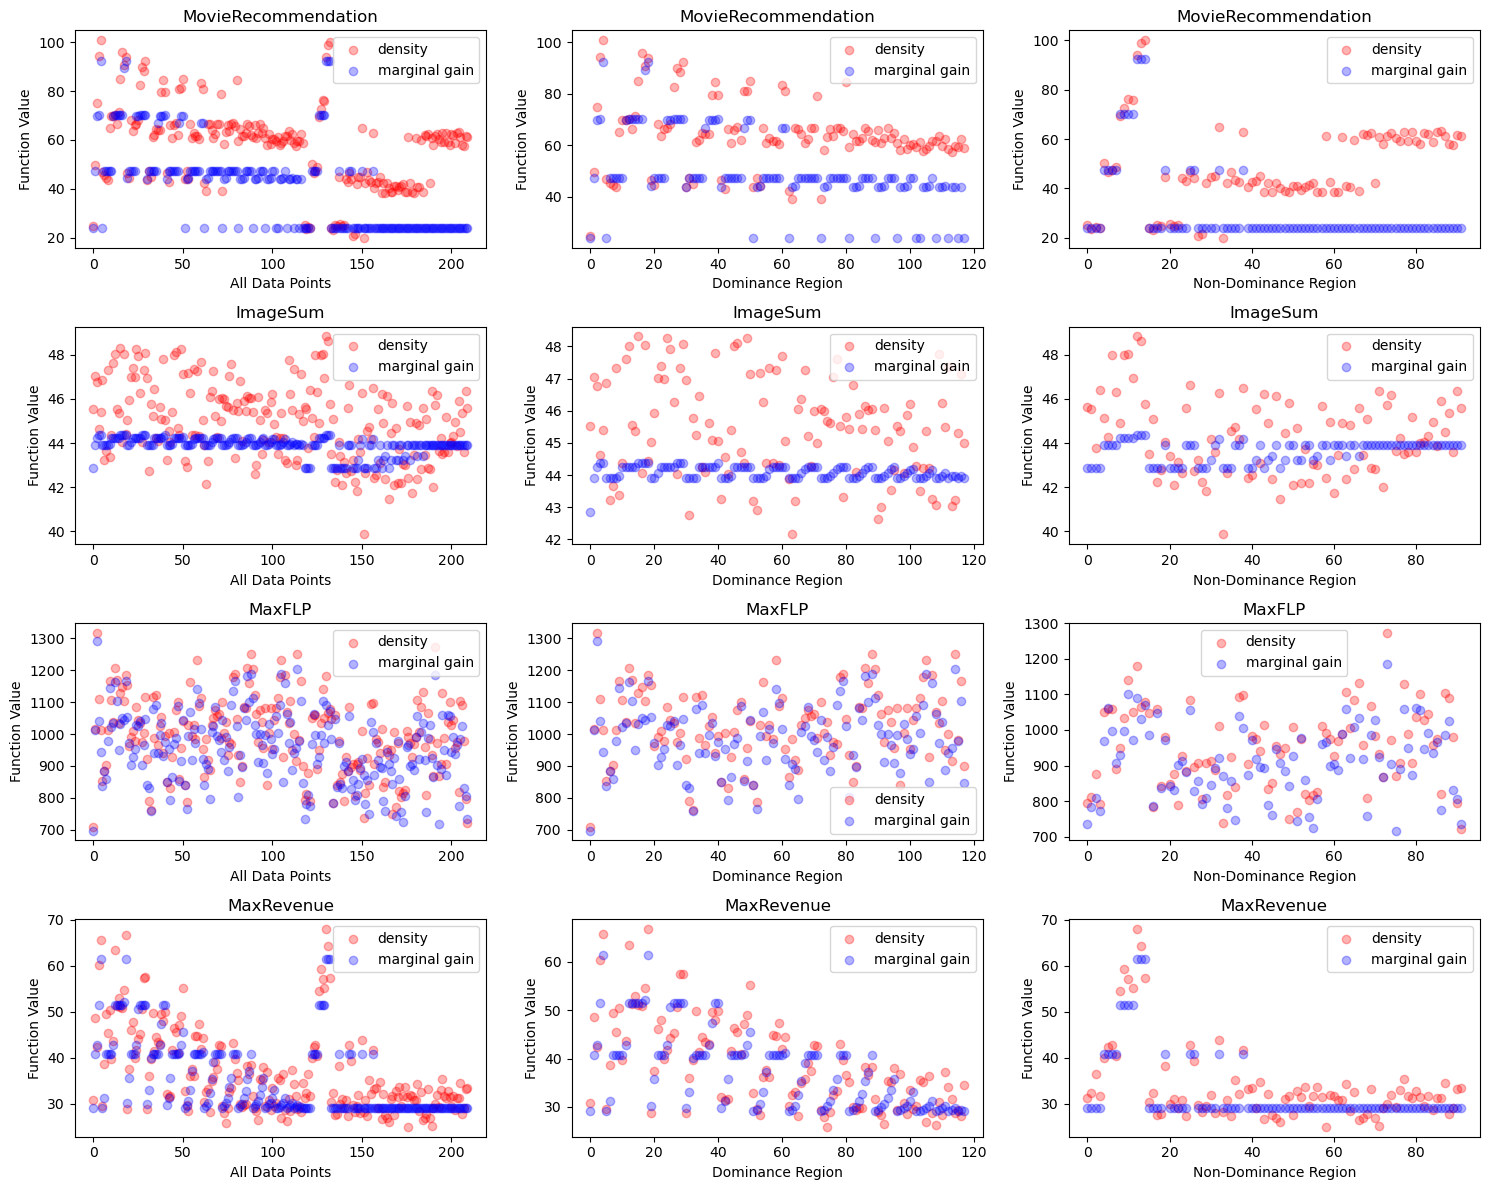

In [27]:
# plot the difference between theoretical and practical performance
fig, axs = plt.subplots(len(tasks), 3, figsize=(15, 12))

for i, task in enumerate(tasks):
    task_df = df[df['model_name'] == task.split()[0]]
    dominance_task_df = task_df[task_df['is_dominance_theoretical'] == True]
    non_dominance_task_df = task_df[task_df['is_dominance_theoretical'] == False]
    for j, sub_task_df in enumerate([task_df, dominance_task_df, non_dominance_task_df]):
        ax = axs[i, j]
        ax.scatter(np.arange(len(sub_task_df)), sub_task_df['density'], label='density', color='red', alpha=0.3)
        ax.scatter(np.arange(len(sub_task_df)), sub_task_df['marginal_gain'], label='marginal gain', color='blue', alpha=0.3)
        ax.set_title(task)
        if j == 0:
            ax.set_xlabel('All Data Points')
        elif j == 1:
            ax.set_xlabel('Dominance Region')
        elif j == 2:
            ax.set_xlabel('Non-Dominance Region')
        else:
            raise ValueError("Invalid j value")
        ax.set_ylabel('Function Value')
        ax.legend()

plt.tight_layout()
plt.show()

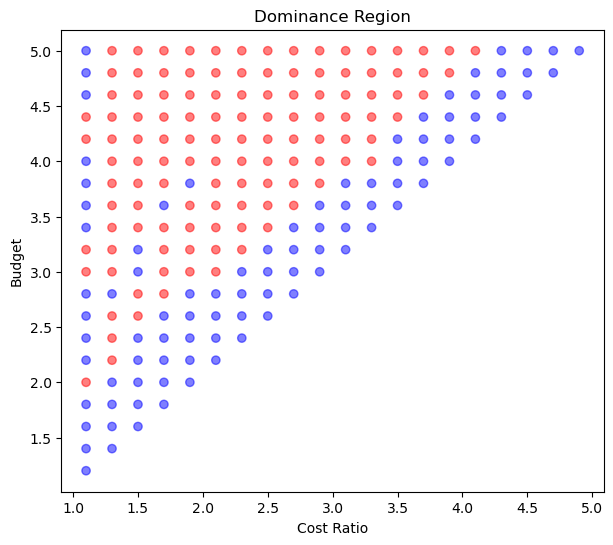

In [21]:
mask = df['model_name'] == 'MovieRecommendation'
df[mask]
plt.figure(figsize=(7, 6))
colors = df[mask]['is_dominance_theoretical'].map({True: 'red', False: 'blue'})
plt.scatter(df[mask]['cost_ratio'], df[mask]['budget'], c=colors, alpha=0.5)
plt.xlabel('Cost Ratio')
plt.ylabel('Budget')
plt.title('Dominance Region')
plt.show()

# Performance Evaluation

In [3]:
df = pd.read_csv("../result/CostInterpolation-20250211/performance/output_5.txt")
df.head()

,model_name,baseline_name,cost_ratio,budget,f(S)
0,MovieRecommendation,Density,1.1,1.20,23.491139
1,MovieRecommendation,Density,1.1,2.15,46.668597
2,MovieRecommendation,Density,1.1,3.10,65.718081
3,MovieRecommendation,Density,1.1,4.05,69.999461
4,MovieRecommendation,Density,1.1,5.00,92.133100


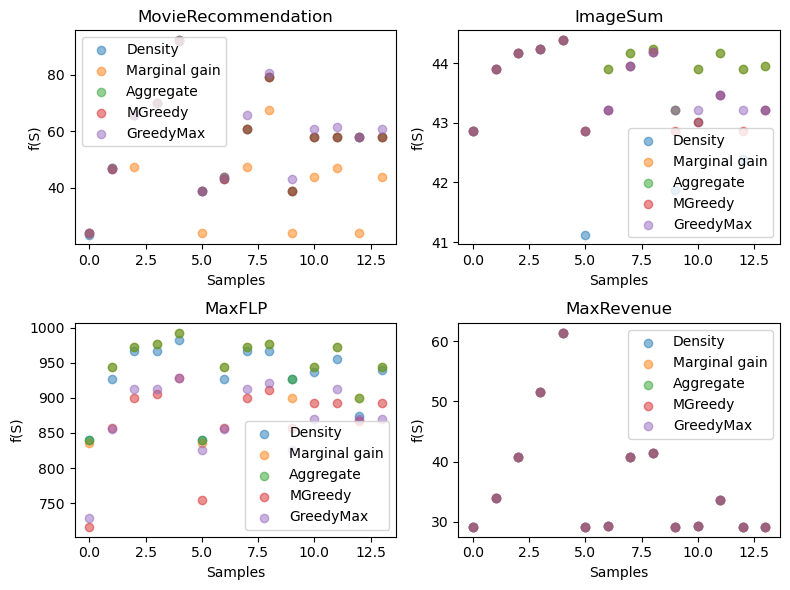

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Get unique tasks and baseline names
tasks = df['model_name'].unique()
baseline_names = df['baseline_name'].unique()

for i, task in enumerate(tasks):
    ax = axs[i // 2, i % 2]
    task_df = df[df['model_name'] == task]
    
    for baseline in baseline_names:
        baseline_df = task_df[task_df['baseline_name'] == baseline]
        ax.scatter(np.arange(len(baseline_df)), baseline_df['f(S)'], label=baseline, alpha=0.5)
    
    ax.set_title(task)
    ax.set_xlabel('Samples')
    ax.set_ylabel('f(S)')
    ax.legend()

plt.tight_layout()
plt.show()

In [6]:
from tabulate import tabulate

# Calculate the relative improvement percentage
improvement_data = []

for baseline in baseline_names:
    if baseline == 'Aggregate':
        continue
    row = [baseline]
    for task in tasks:
        task_df = df[df['model_name'] == task]
        aggregate_fS = task_df[task_df['baseline_name'] == 'Aggregate']['f(S)'].mean()
        baseline_fS = task_df[task_df['baseline_name'] == baseline]['f(S)'].mean()
        improvement_percentage = ((aggregate_fS - baseline_fS) / baseline_fS) * 100
        row.append(improvement_percentage)
    improvement_data.append(row)

# Create a table
headers = ["Baseline"] + list(tasks)
latex_table = tabulate(improvement_data, headers=headers, tablefmt="latex", floatfmt=".2f")
print(latex_table)

\begin{tabular}{lrrrr}
\hline
 Baseline      &   MovieRecommendation &   ImageSum &   MaxFLP &   MaxRevenue \\
\hline
 Density       &                  0.27 &       1.30 &     0.97 &         0.00 \\
 Marginal gain &                 22.57 &       0.00 &     0.26 &         0.00 \\
 MGreedy       &                  0.20 &       0.77 &     8.35 &         0.00 \\
 GreedyMax     &                 -2.48 &       0.62 &     7.74 &         0.00 \\
\hline
\end{tabular}


# Debug Maximum Revenue Application